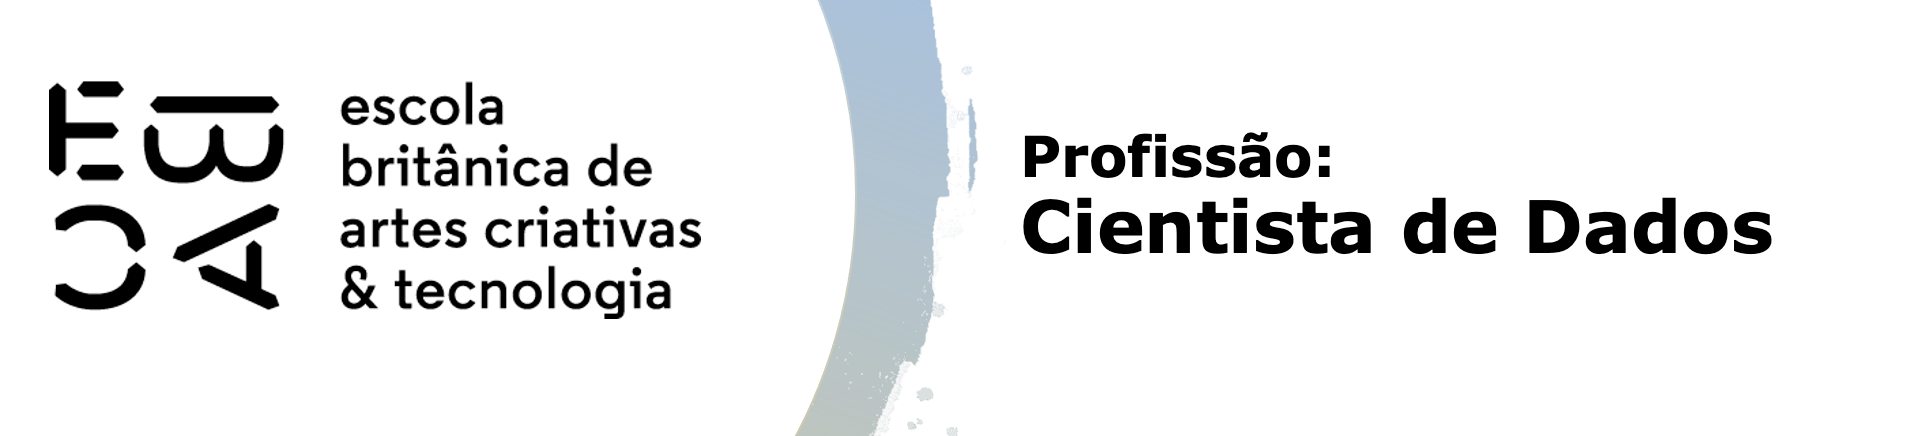

# Tarefa

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
pg = sns.load_dataset('penguins')
display(pg.isna().sum())
pg.dropna(subset=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex'], inplace=True)
pg.groupby('sex')['body_mass_g'].describe()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,165.0,3862.272727,666.172050,2700.0,3350.0,3650.0,4550.0,5200.0
Male,168.0,4545.684524,787.628884,3250.0,3900.0,4300.0,5312.5,6300.0


## 1) Diferença de peso entre machos e fêmeas

Na base de pinguins, podemos ver que há diferença de peso entre machos e fêmeas. Mas será que é uma conclusão extrapolável a toda a população de pinguins? Assumindo que essa amostra é aleatória e representativa da população de pinguins, realize um teste T com 5% de significância para verificar se podemos induzir esta conclusão para a população toda.

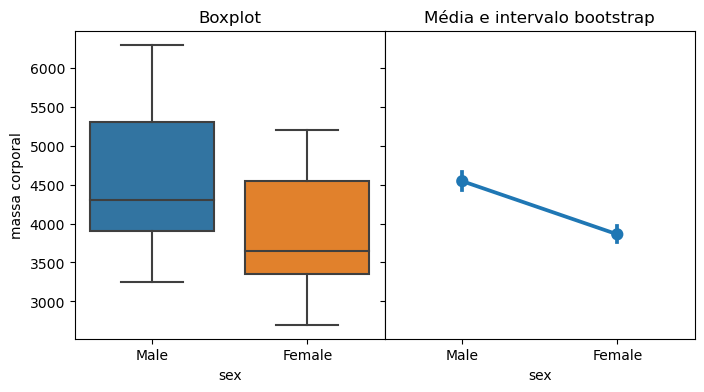

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(8,4), sharey=True)

sns.boxplot(data=pg, y='body_mass_g', x='sex', ax=ax[0])
ax[0].set_title('Boxplot')
# ax[0].set_ylim((-4, 0))
# ax[1].set_ylim((-4, 0))
ax[0].set_ylabel('massa corporal')

sns.pointplot(data=pg, y='body_mass_g', x='sex', ax=ax[1])
ax[1].set_title('Média e intervalo bootstrap')
ax[1].set_ylabel('')

plt.subplots_adjust(wspace=0)

In [4]:
from statsmodels.stats.weightstats import ttest_ind
x1 = pg[pg['sex'] == 'Male']['body_mass_g']
x2 = pg[pg['sex'] == 'Female']['body_mass_g']

teste_t = ttest_ind(x1, x2, alternative='larger', usevar='pooled', value=0)
p_value=round(teste_t[1],4)
grau_liberdade=teste_t[2]
print('\033[1mTeste T:\033[0m')
print('='*8)
print(f'Estatística do teste: {teste_t[0]:.2f}')
print(f'             P-value: {teste_t[1]:.4f}')
print(f'  Graus de liberdade: {teste_t[2]:.2f}')

if p_value < 0.05:
    print('\033[1mConclusão:\033[0m rejeita-se H0, há diferença de peso entre machos e fêmeas na população de pinguins.')
else:
    print('\033[1mConclusão:\033[0m não se rejeita H0, não há evidência suficiente para afirmar que há diferença de peso entre machos e fêmeas na população de pinguins.')


Teste T:
Estatística do teste: 8.54
             P-value: 0.0000
  Graus de liberdade: 331.00
Conclusão: rejeita-se H0, há diferença de peso entre machos e fêmeas na população de pinguins.


### Conclusão
Como o valor de p é menor que alpha (0,05), podemos rejeitar a hipótese nula e concluir que há evidência estatística para afirmar que há diferença significativa de peso médio entre machos e fêmeas na população de pinguins. Portanto, podemos induzir que a diferença de peso entre machos e fêmeas na amostra é provavelmente uma característica da população de pinguins.

## 2) (opcional) Representação gráfica do teste

Siga os passos da aula para você poder visualizar a estatística do teste, sua distribuição e a região crítica do teste.

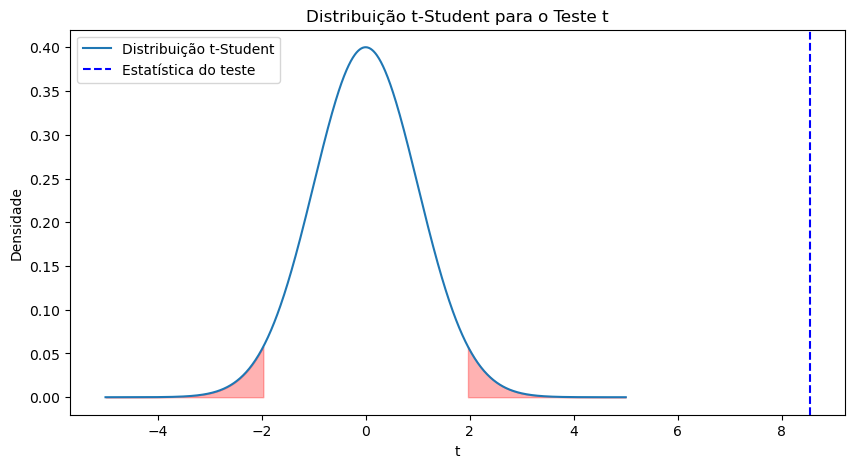

In [5]:
from scipy.stats import norm

# Realizando o teste t
teste_t = ttest_ind(x1, x2, alternative='larger', usevar='pooled', value=0)
p_value=round(teste_t[1],4)
grau_liberdade=teste_t[2]

# Obtendo a estatística do teste e os limites da região crítica
t_stat = teste_t[0]
alpha = 0.05
t_critico = norm.ppf(1-alpha, loc=0, scale=1) # t crítico para alpha = 0.05, 2-tailed
rc_esquerda = norm.ppf(alpha/2, loc=0, scale=1)
rc_direita = -rc_esquerda

# Definindo a figura e os eixos do gráfico
fig, ax = plt.subplots(figsize=(10,5))

# Plotando a distribuição t-Student com os graus de liberdade calculados
x = np.linspace(-5, 5, 1000)
y = norm.pdf(x, loc=0, scale=1) * np.sqrt(grau_liberdade/(grau_liberdade-2))
ax.plot(x, y, label='Distribuição t-Student')

# Preenchendo a região crítica
ax.fill_between(x[x <= rc_esquerda], 0, y[x <= rc_esquerda], color='red', alpha=0.3)
ax.fill_between(x[x >= rc_direita], 0, y[x >= rc_direita], color='red', alpha=0.3)

# Plotando a estatística do teste
ax.axvline(t_stat, color='blue', linestyle='--', label='Estatística do teste')

# Adicionando legendas e título
ax.set_xlabel('t')
ax.set_ylabel('Densidade')
ax.set_title('Distribuição t-Student para o Teste t')
ax.legend()

# Exibindo o gráfico
plt.show()


## 3) Considere as espécies

Repita o exercício I, uma vez para cada espécie de pinguim. Qual é o *p-value* associado a cada raça?

In [6]:
from scipy.stats import ttest_ind
species = pg['species'].unique()

for s in species:
    print(f'Espécie: {s}')
    df = pg[pg['species'] == s]
    
    male_penguins = df[df['sex'] == 'Male']['body_mass_g']
    female_penguins = df[df['sex'] == 'Female']['body_mass_g']
    
    t_stat, p_value = ttest_ind(male_penguins, female_penguins, equal_var=False)
    
    print(f'Estatística do Teste: {t_stat:.2f}')
    print(f'p-value: {p_value:.5f}\n')


Espécie: Adelie
Estatística do Teste: 13.13
p-value: 0.00000

Espécie: Chinstrap
Estatística do Teste: 5.21
p-value: 0.00000

Espécie: Gentoo
Estatística do Teste: 14.76
p-value: 0.00000

